In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skit
import seaborn as sns
from IPython.display import display, Markdown, Latex
import warnings
warnings.filterwarnings('ignore')

In [2]:
def do_plot(sizeX, sizeY, index, data, xLabel, yLabel, legend, file, xTicks = 30, yTicks = 30, 
            dataDiv = 1, linewidth = 0.0, log = False):
    data = data / dataDiv
    fig, ax = plt.subplots(figsize=(sizeX,sizeY))
    if log:
        ax.set_yscale('log', basey=2)
    if index is None:
        ax.plot(data ,  marker='.',linewidth=0.0,  markersize=40)
    else:
        ax.plot(index, data ,  marker='.',linewidth=linewidth,  markersize=40)
        ax.set_xticks(index)
    yTick = []
    last = None
    tick = data.values.reshape((data.values.size))
    tick.sort()
    tick = tick[~np.isnan(tick)]
    minSize = tick[-1] / yTicks
    for i in tick:
        if last is None:
            yTick.append(i)
            last = i
            continue
        if i - last > minSize:
            yTick.append(i)
            last = i
    ax.set_yticks(yTick)
    
    xTick = []
    last = None
    tick = index.values
    tick.sort()
    tick = tick[~np.isnan(tick)]
    minSize = tick[-1] / xTicks
    for i in tick:
        if last is None:
            xTick.append(i)
            last = i
            continue
        if i - last > minSize:
            xTick.append(i)
            last = i
    ax.set_xticks(xTick)
    
    ax.legend(legend, bbox_to_anchor=(0., 1.02, 1., .102), fontsize = 40, ncol=2,
              loc='lower left',mode="expand", borderaxespad=0.)
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)
    plt.xlabel(xLabel, size = 35)
    plt.ylabel(yLabel, size = 35)
    plt.grid()
    fig.savefig(file, bbox_inches='tight')

In [3]:
data_gen_count1 = pd.read_csv('results/genCount1/t_data.csv').reset_index(drop=True)
data_gen_count2 = pd.read_csv('results/genCount2/t_data.csv').reset_index(drop=True)
data_gen_size1 = pd.read_csv('results/genSize1/t_data.csv').reset_index(drop=True)
data_gen_size2 = pd.read_csv('results/genSize2/t_data.csv').reset_index(drop=True)
data_mut1 = pd.read_csv('results/mut1/t_data.csv').reset_index(drop=True)
data_mut2 = pd.read_csv('results/mut2/t_data.csv').reset_index(drop=True)
data_cros1 = pd.read_csv('results/cros1/t_data.csv').reset_index(drop=True)
data_cros2 = pd.read_csv('results/cros2/t_data.csv').reset_index(drop=True)
data_select1 = pd.read_csv('results/select1/t_data.csv').reset_index(drop=True)
data_select2 = pd.read_csv('results/select2/t_data.csv').reset_index(drop=True)

time_var1 = data_mut2.groupby(['n_var']).mean()['time']
time_var2 = data_cros2.groupby(['n_var']).mean()['time']
time_clause1 = data_mut2.groupby(['n_clause']).mean()['time']
time_clause2 = data_cros2.groupby(['n_clause']).mean()['time']
df = pd.DataFrame([time_var1, time_var2, time_clause1, time_clause2]).T
df.columns = ['n_var1', 'n_var2', 'n_clause1', 'n_clause2']

def do_data_frame(data1, data2, column, columns):
    t1 = data1.groupby([column]).mean()['satisfied']
    t2 = data1.groupby([column]).mean()['score']
    t3 = data2.groupby([column]).mean()['satisfied']
    t4 = data2.groupby([column]).mean()['score']
    t5 = data1.groupby([column]).mean()['time']
    t6 = data2.groupby([column]).mean()['time']
    tmp = pd.DataFrame([t1, t3, t2, t4, t5, t6]).T
    tmp.columns = columns
    return tmp
    
gen_count = do_data_frame(data_gen_count1, data_gen_count2, 'gen_count', 
                          ['n_sat1', 'n_sat2', 'n_score1', 'n_score2', 'time_1', 'time_2'])
gen_size = do_data_frame(data_gen_size1, data_gen_size2, 'gen_size', 
                         ['n_sat1', 'n_sat2', 'n_score1', 'n_score2', 'time_1', 'time_2'])
gen_mut = do_data_frame(data_mut1, data_mut2, 'mut', 
                        ['n_sat1', 'n_sat2', 'n_score1', 'n_score2', 'time_1', 'time_2'])
gen_cross = do_data_frame(data_cros1, data_cros2, 'cross', 
                          ['n_sat1', 'n_sat2', 'n_score1', 'n_score2', 'time_1', 'time_2'])
gen_select = do_data_frame(data_select1, data_select2, 't_size', 
                           ['n_sat1', 'n_sat2', 'n_score1', 'n_score2', 'time_1', 'time_2'])


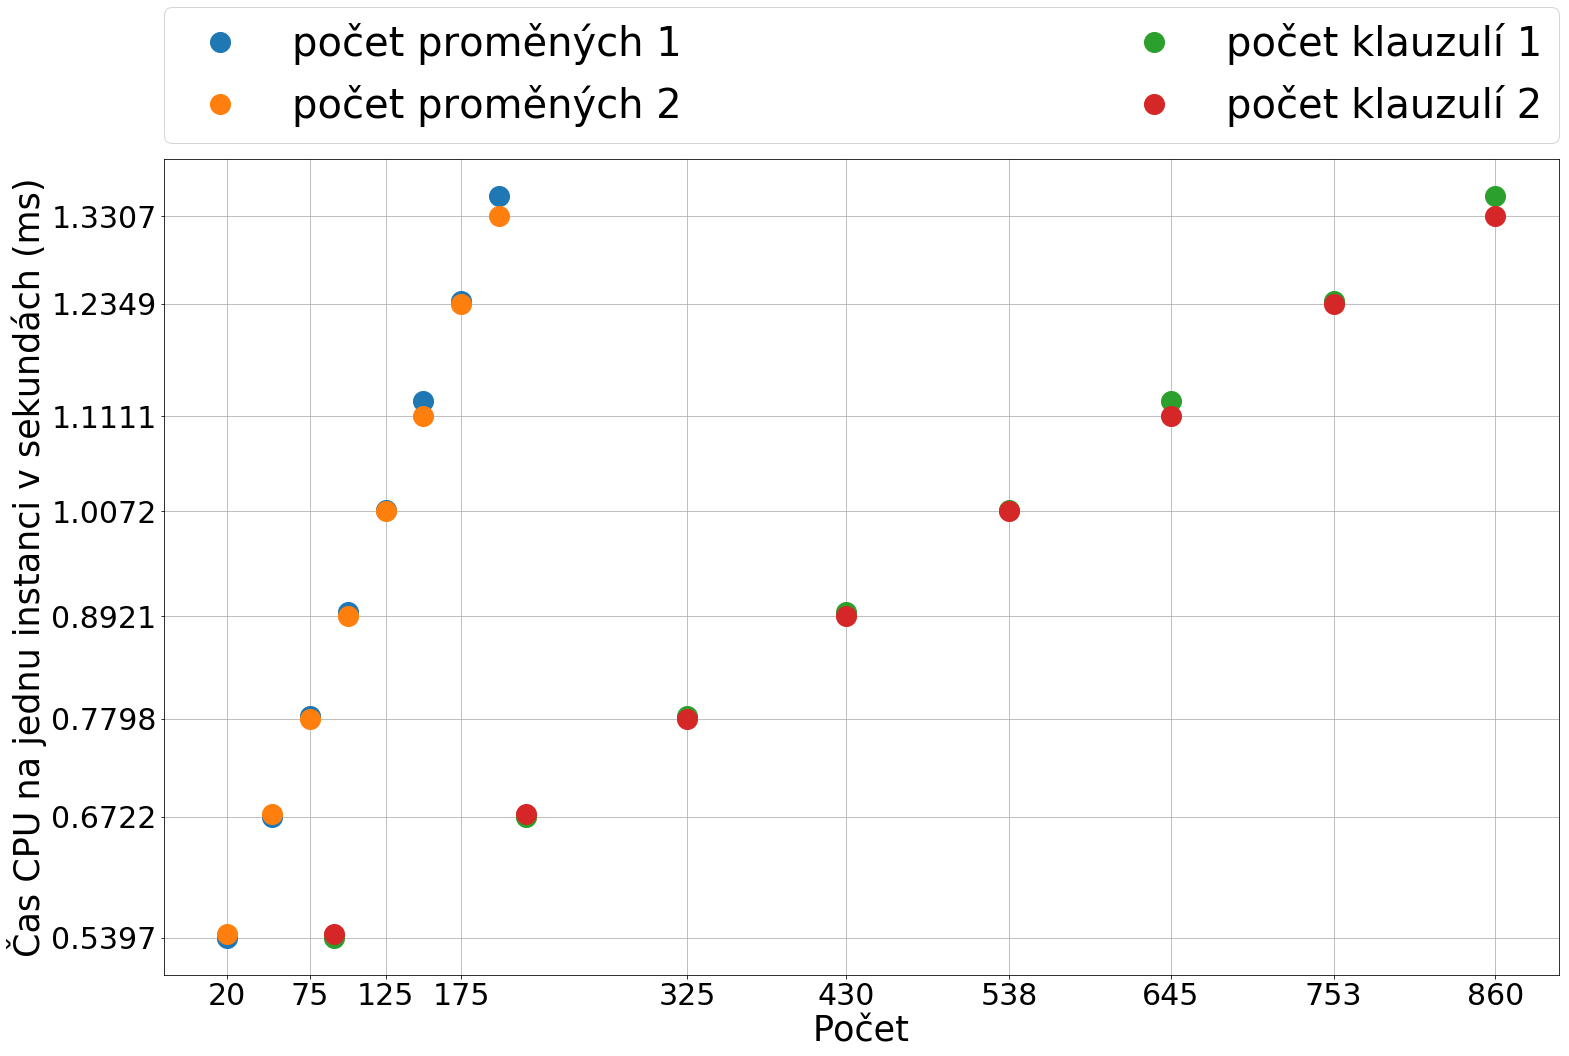

In [4]:
do_plot(25, 15, df.index, df[['n_var1', 'n_var2', 'n_clause1', 'n_clause2']], 
        "Počet", 
        "Čas CPU na jednu instanci v sekundách (ms)", 
        ['počet proměných 1', 'počet proměných 2', 'počet klauzulí 1', 'počet klauzulí 2'], 
        "time_n_var_cla.pdf", 20, 40, 1)

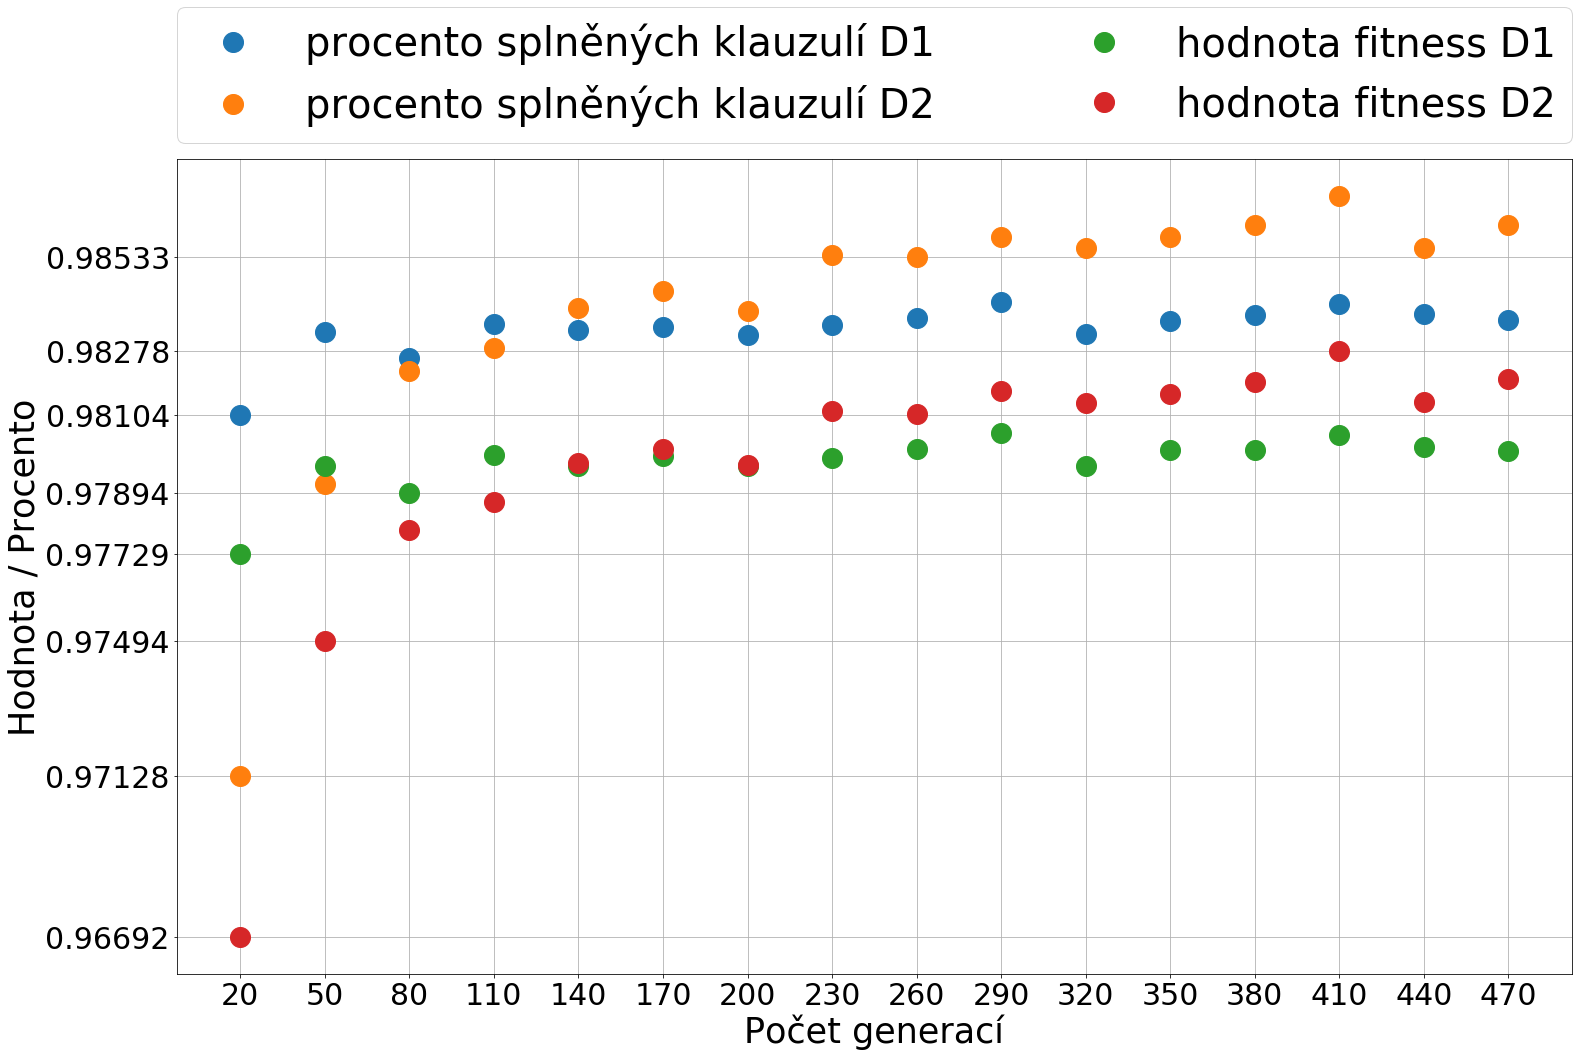

In [17]:
do_plot(25, 15, gen_count.index, gen_count[['n_sat1', 'n_sat2', 'n_score1', 'n_score2']], 
        "Počet generací", 
        "Hodnota / Procento", 
        ['procento splněných klauzulí D1', 'procento splněných klauzulí D2', 'hodnota fitness D1', 'hodnota fitness D2'], 
        "sat_gen_count.pdf", 400, 600, 1, 0)

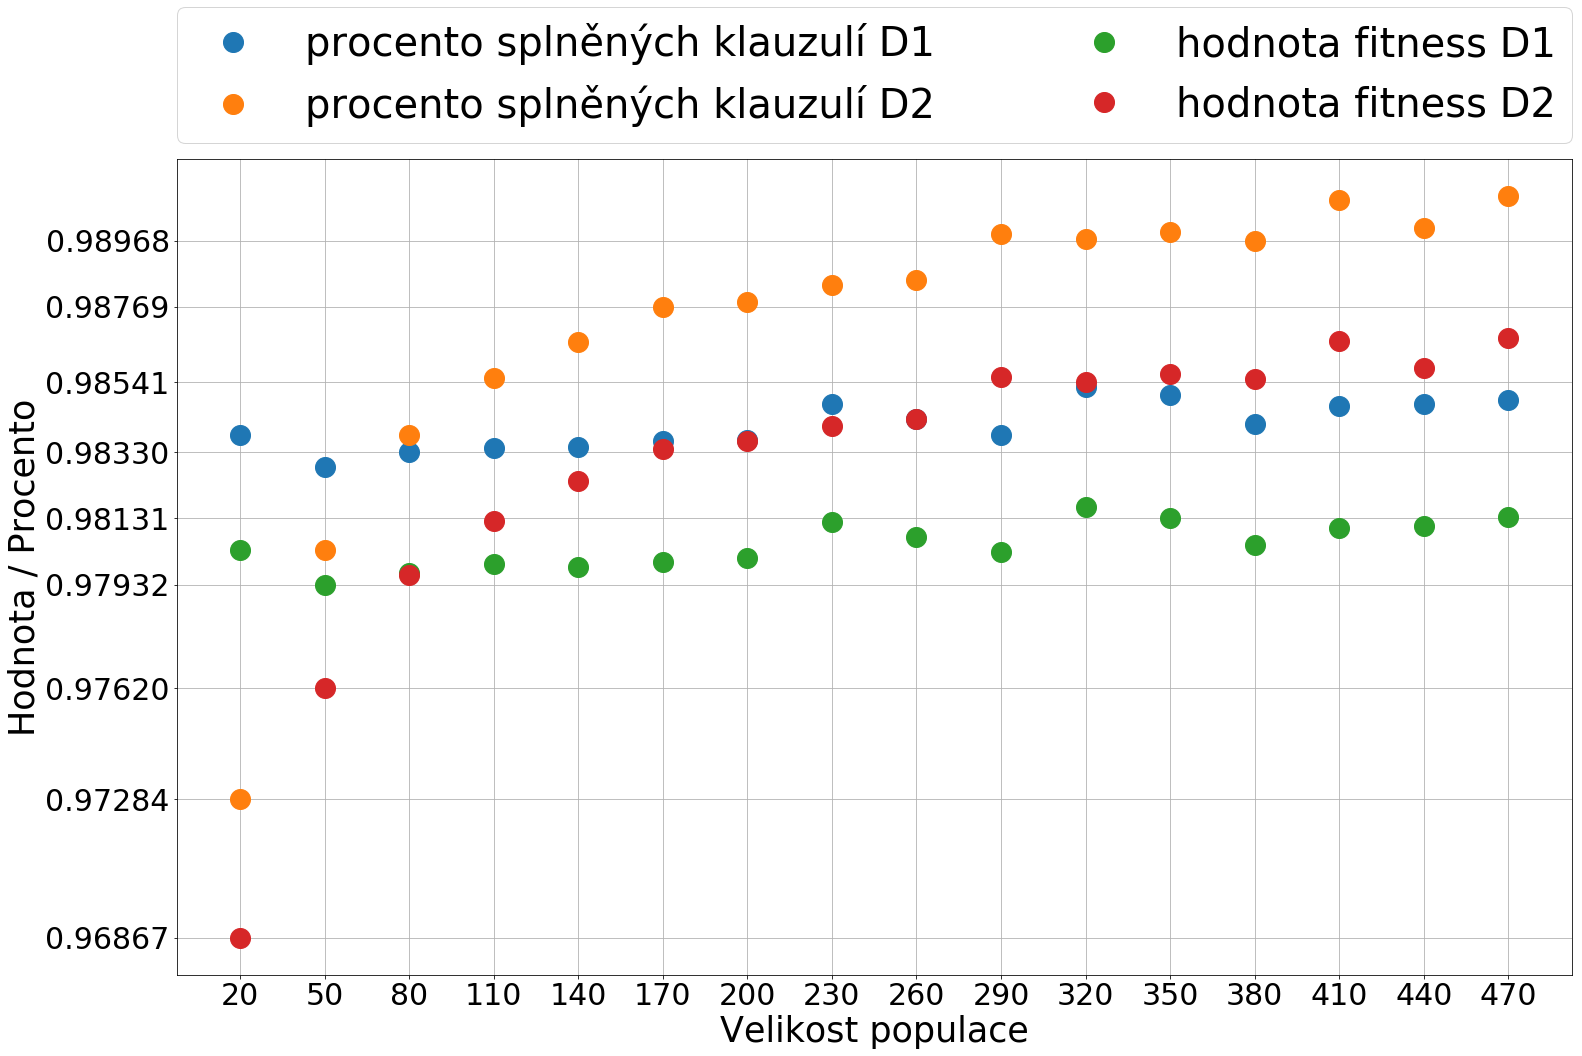

In [18]:
do_plot(25, 15, gen_size.index, gen_size[['n_sat1', 'n_sat2', 'n_score1', 'n_score2']], 
        "Velikost populace", 
        "Hodnota / Procento", 
        ['procento splněných klauzulí D1', 'procento splněných klauzulí D2', 'hodnota fitness D1', 'hodnota fitness D2'], 
        "sat_gen_size.pdf", 400, 500, 1, 0)

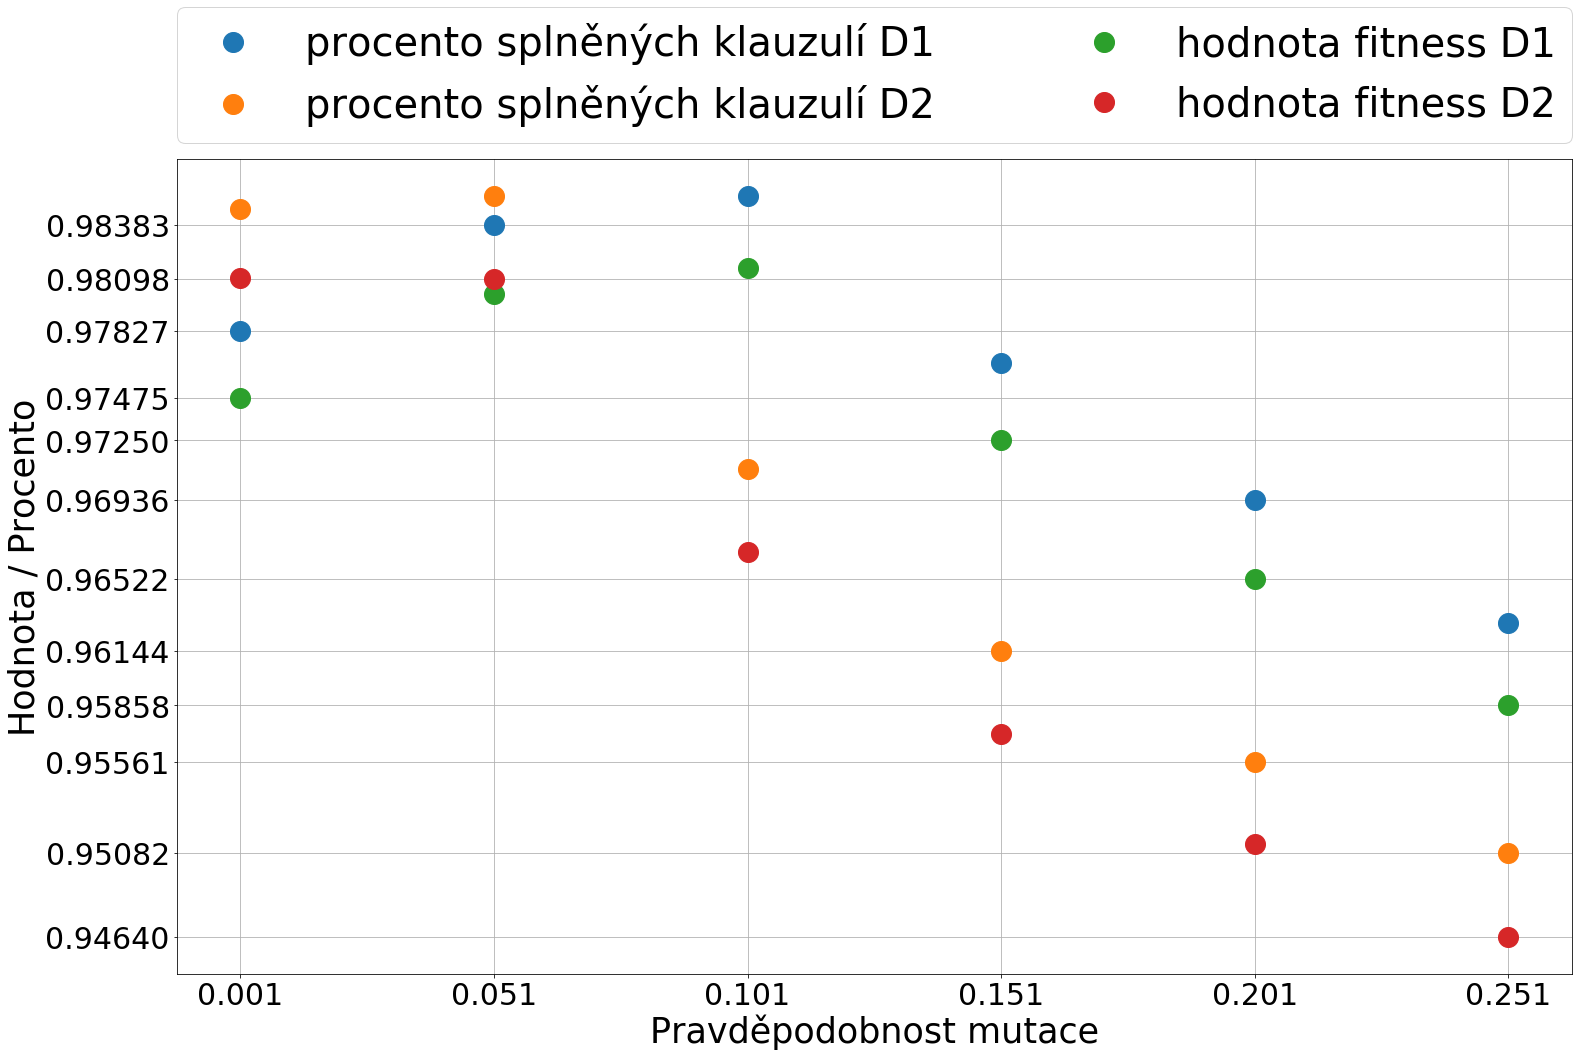

In [15]:
do_plot(25, 15, gen_mut.index, gen_mut[['n_sat1', 'n_sat2', 'n_score1', 'n_score2']], 
        "Pravděpodobnost mutace", 
        "Hodnota / Procento", 
        ['procento splněných klauzulí D1', 'procento splněných klauzulí D2', 'hodnota fitness D1', 'hodnota fitness D2'], 
        "sat_mut.pdf", 400, 500, 1, 0.)

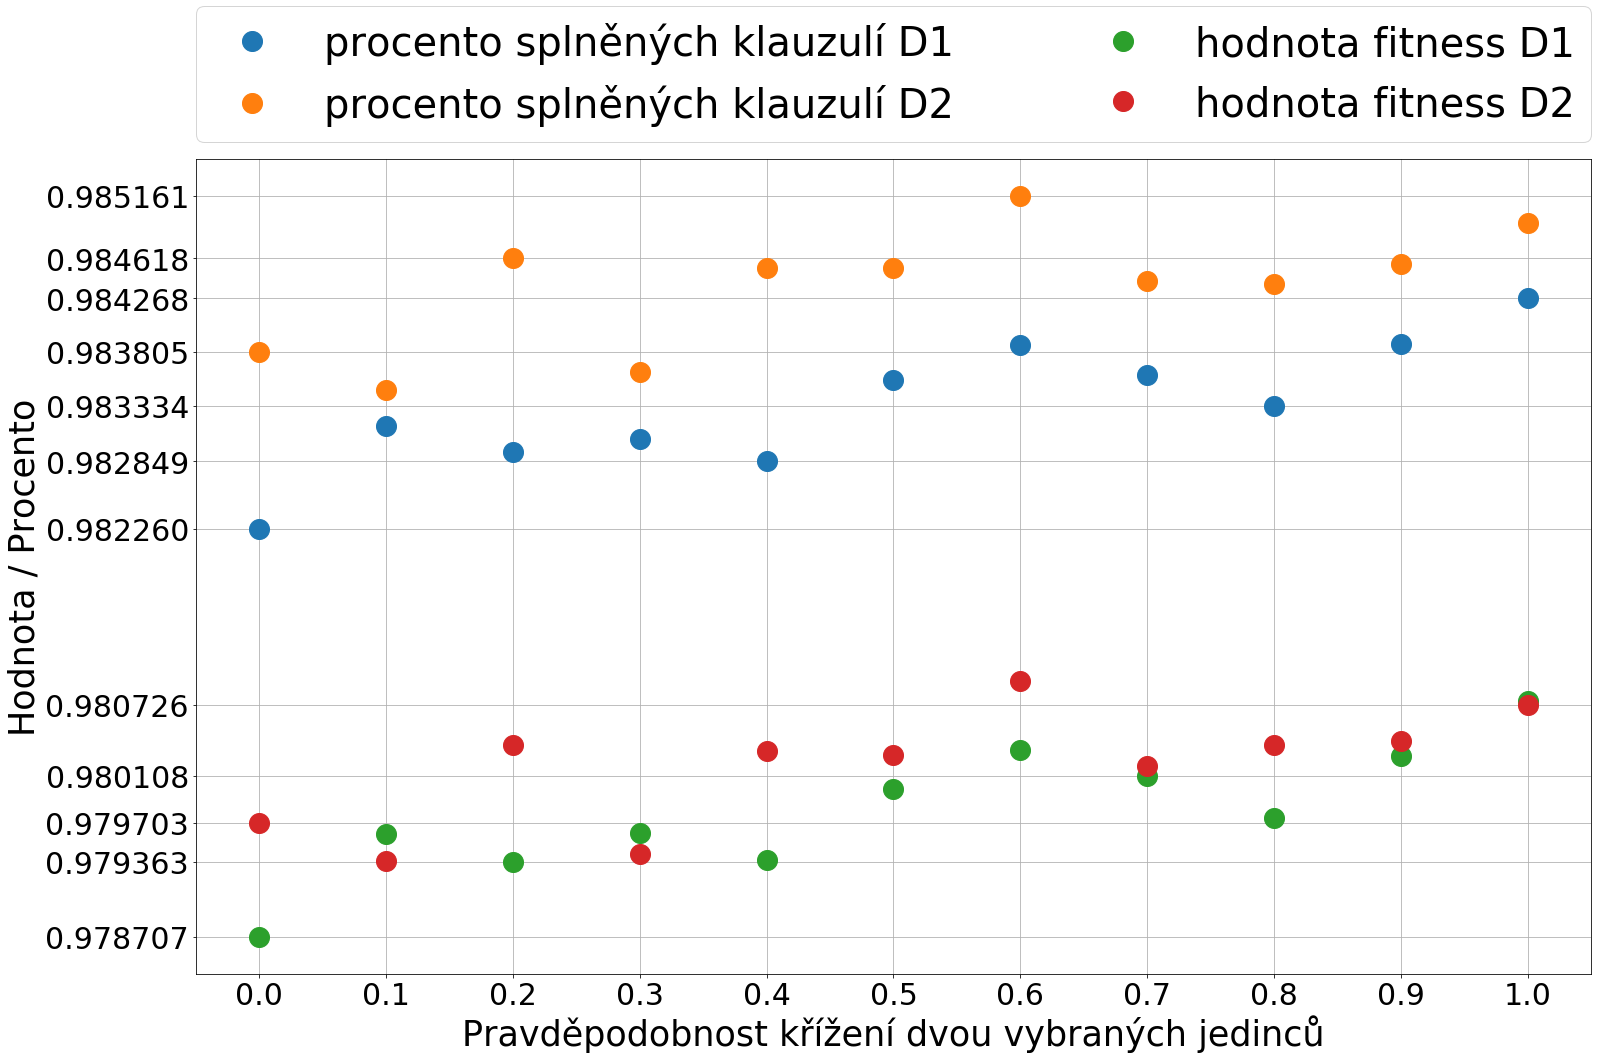

In [14]:
do_plot(25, 15, gen_cross.index, gen_cross[['n_sat1', 'n_sat2', 'n_score1', 'n_score2']], 
        "Pravděpodobnost křížení dvou vybraných jedinců", 
        "Hodnota / Procento", 
        ['procento splněných klauzulí D1', 'procento splněných klauzulí D2', 'hodnota fitness D1', 'hodnota fitness D2'], 
        "sat_cross.pdf", 400, 3000, 1, 0.0)

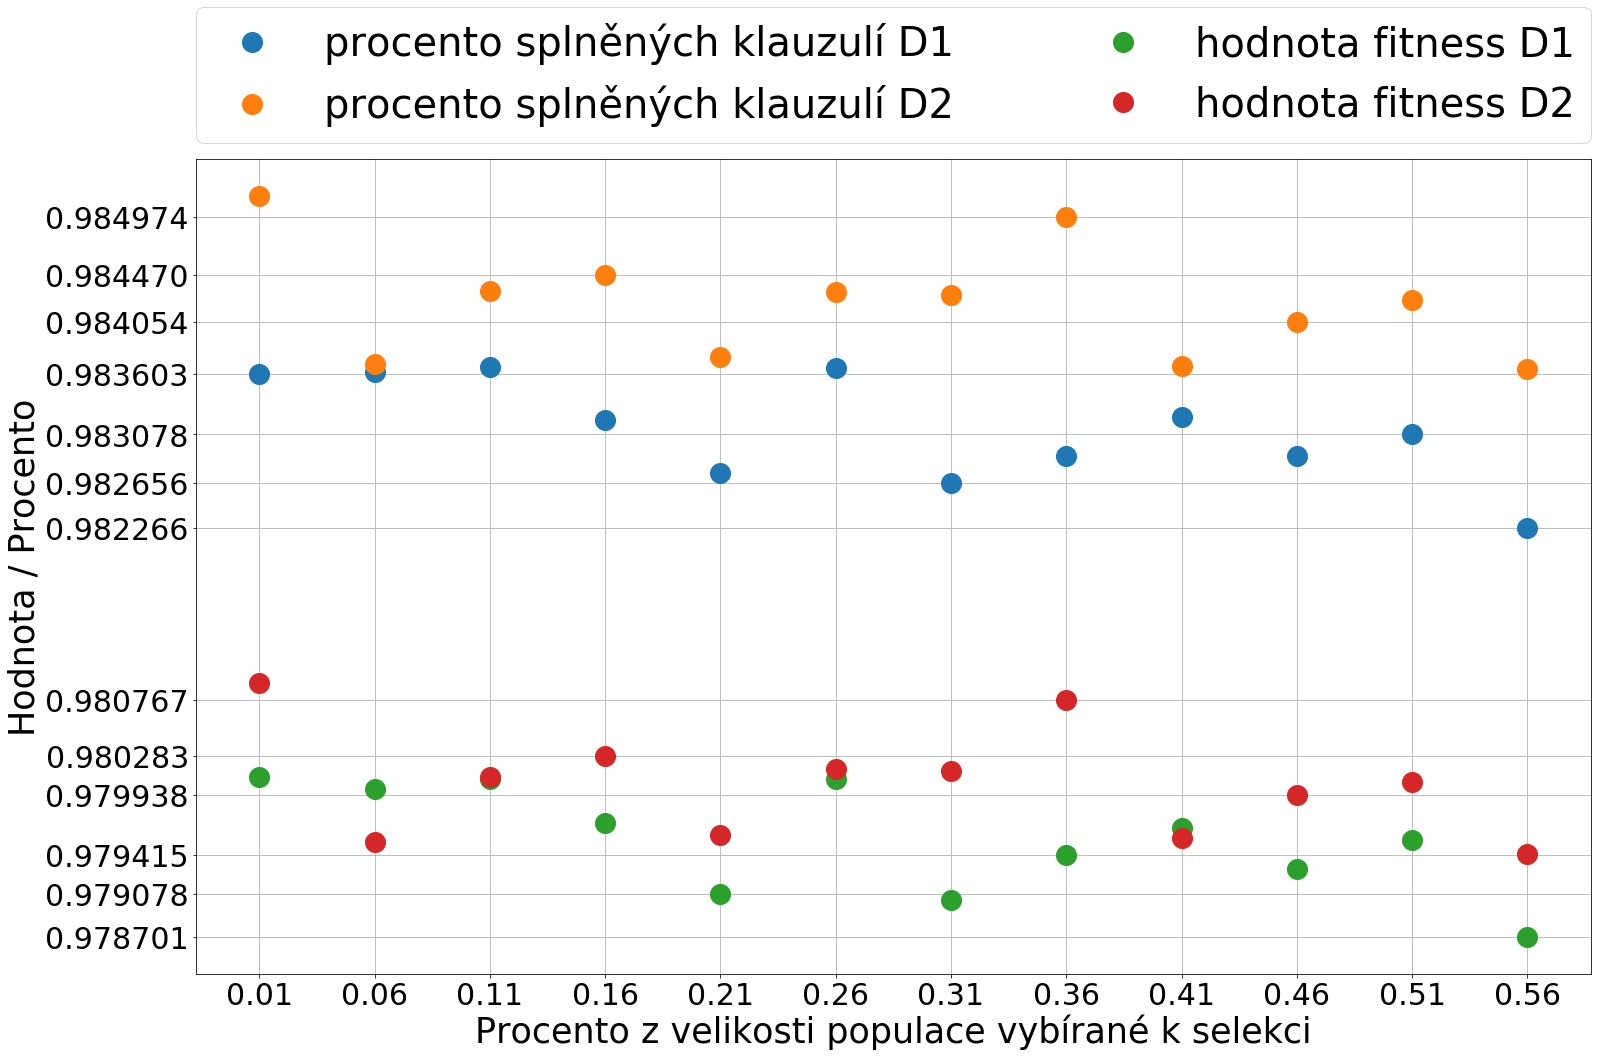

In [12]:
do_plot(25, 15, gen_select.index, gen_select[['n_sat1', 'n_sat2', 'n_score1', 'n_score2']], 
        "Procento z velikosti populace vybírané k selekci", 
        "Hodnota / Procento", 
        ['procento splněných klauzulí D1', 'procento splněných klauzulí D2', 'hodnota fitness D1', 'hodnota fitness D2'], 
        "sat_select.pdf", 400, 3000, 1, 0.0)

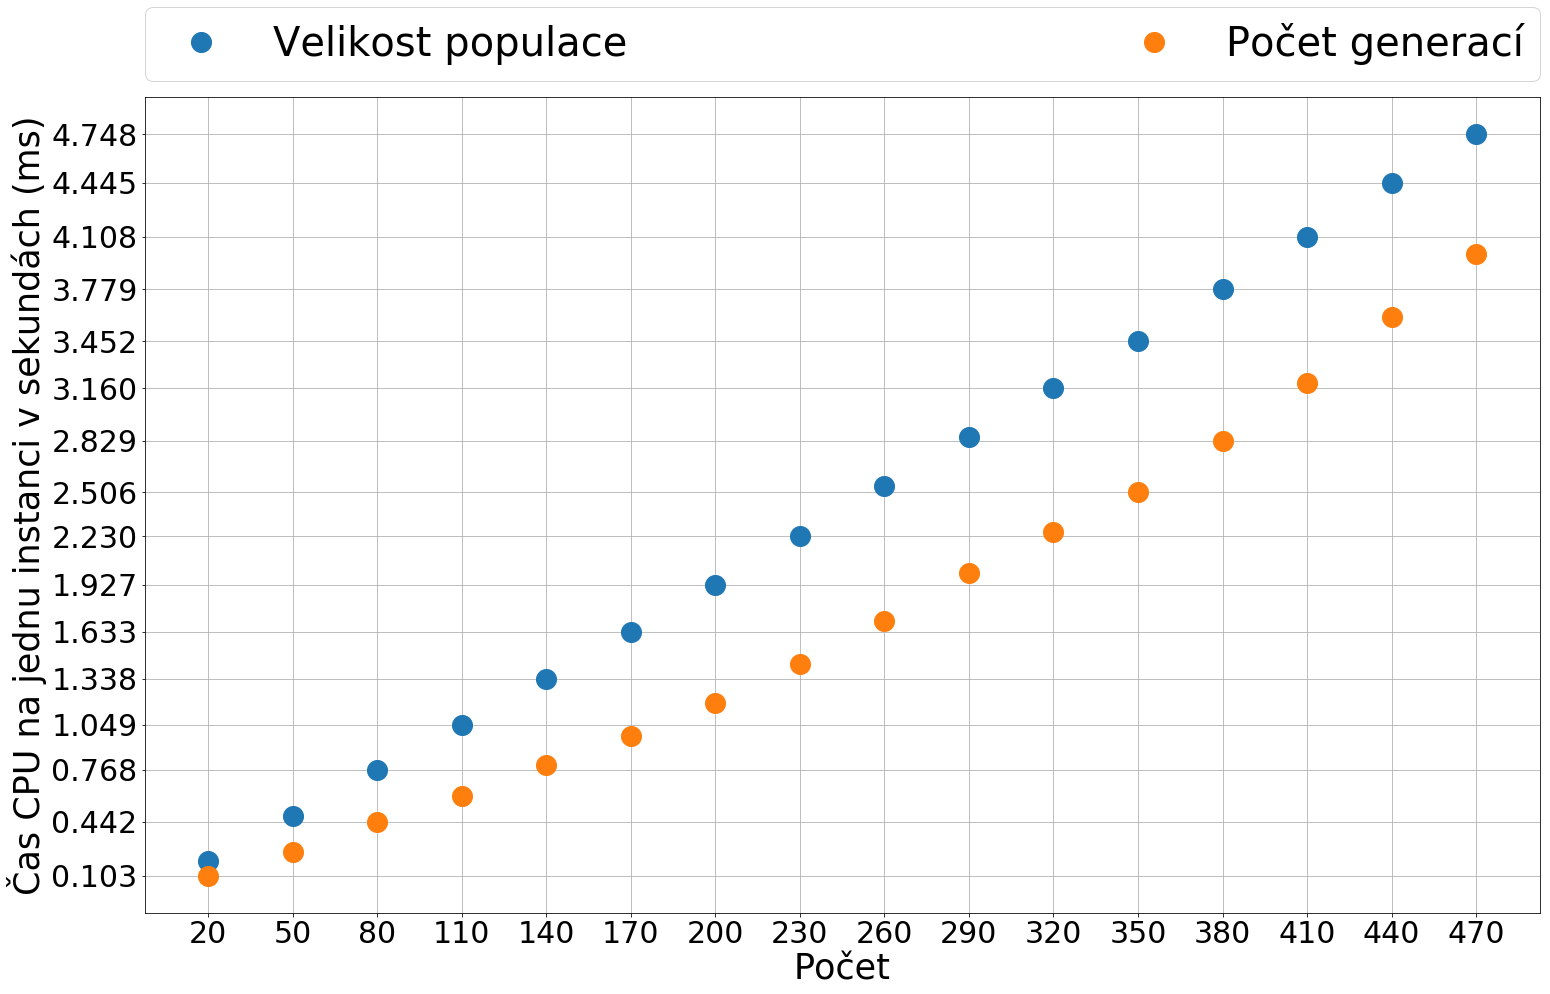

In [10]:
one = gen_size[['time_2']]
two = gen_count[['time_2']]
two.columns = ['time']
one = pd.concat([one, two])
do_plot(25, 15, one.index, one[['time_2', 'time']], 
        "Počet", 
        "Čas CPU na jednu instanci v sekundách (ms)", 
        ['Velikost populace', 'Počet generací'], 
        "time_gen_cnt_sz.pdf", 20, 20, 1)